In [1]:
import pandas as pd

In [22]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('C:/Users/natal/OneDrive/Escritorio/Canadian Pr/datasets/combined_data_no_dates.csv')

# Convertir 'year' y 'month' a enteros (sin decimales)
df['year'] = df['year'].astype('Int64')
df['month'] = df['month'].astype('Int64')

# Guardar los cambios en el mismo archivo CSV
df.to_csv('combined_data_no_dates.csv', index=False)


In [59]:
df = pd.read_csv('C:/Users/natal/OneDrive/Escritorio/Canadian Pr/datasets/combined_data_both_corrected.csv', 
                 dtype={'year_x': 'Int64', 'month_x': 'Int64','year_y':'Int64','month_y':'Int64'})
pd.set_option('display.max_columns', None)
display(df)

,year_x,month_x,owner_org,owner_org_title_x,reference_number,procurement_id,vendor_name,vendor_postal_code,buyer_name,contract_date,economic_object_code,description_en,description_fr,contract_period_start,delivery_date,contract_value,original_value,amendment_value,comments_en,comments_fr,additional_comments_en,additional_comments_fr,agreement_type_code,trade_agreement,land_claims,commodity_type,commodity_code,country_of_vendor,solicitation_procedure,limited_tendering_reason,trade_agreement_exceptions,aboriginal_business,aboriginal_business_incidental,intellectual_property,potential_commercial_exploitation,former_public_servant,contracting_entity,standing_offer_number,instrument_type,ministers_office,number_of_bids,article_6_exceptions,award_criteria,socioeconomic_indicator,reporting_period,record_created,record_modified,user_modified,owner_org_title_y,year_y,month_y,_merge
0,2020,4,chrc-ccdp,Canadian Human Rights Commission | Commission ...,P1600422,P1600422,Advanced Chippewa Technologies Inc.,NaN,NaN,2016-02-09,NaN,0584 License/Maintenance fees for Server Opera...,584-Frais de licence/maintenance du système d'...,2016-03-23,2017-03-22,11618.10,11618.10,NaN,Purchase of Watchguard firewall for internet s...,Achat du pare-feu Watchguard utilisé pour la s...,NaN,NaN,NaN,NaN,NaN,G,N7030,CA,TC,NaN,0.0,NaN,Y,B,N,N,1,EN578-100808/142/EE,C,NaN,NaN,NaN,NaN,NaN,2015-2016-Q4,NaN,NaN,*,NaN,2016,2,both
1,2020,4,chrc-ccdp,Canadian Human Rights Commission | Commission ...,P1300405-4,P1300405-4,Alcea Technologies Inc.,NaN,NaN,2013-01-30,NaN,0664 Repair & Maintenance of Communications/Ne...,0664 Réparation et entretien d'équipement de c...,2013-04-01,2017-03-31,423428.96,321731.20,101697.76,Provision of services to support and maintain ...,Prestation de services de soutien et d’entreti...,NaN,NaN,Y,NaN,NaN,S,D302A,CA,TC,NaN,0.0,NaN,N,A5,N,N,1,EN578-055605/417/EI,A,NaN,NaN,NaN,NaN,NaN,2015-2016-Q4,NaN,NaN,*,NaN,2013,1,both
2,2020,4,chrc-ccdp,Canadian Human Rights Commission | Commission ...,P1600425,P1600425,Alphinat Inc.,NaN,NaN,2016-02-10,NaN,0473 Information Technology and Telecommunicat...,0473 Experts-conseil en technologie de l'infor...,2016-02-10,2016-03-31,16904.80,16904.80,NaN,Provision of programming services in support o...,Prestation de services de programmation en app...,NaN,NaN,NaN,NaN,NaN,S,D302A,CA,TN,NaN,0.0,NaN,N,A5,N,N,0,NaN,C,NaN,NaN,NaN,NaN,NaN,2015-2016-Q4,NaN,NaN,*,NaN,2016,2,both
3,2020,4,chrc-ccdp,Canadian Human Rights Commission | Commission ...,P1700005,P1700005,Anthony Macauley & Associates Inc.,NaN,NaN,2016-03-31,NaN,0583 License/Maintenance fees for Application ...,0583 Frais de licence/maintenance de logiciels...,2016-04-01,2017-03-31,24679.20,24679.20,NaN,Renewal of annual software license and mainten...,Renouvellement annuel d’une licence de logicie...,NaN,NaN,NaN,NaN,NaN,G,N7030,CA,TN,NaN,0.0,NaN,N,B,N,N,1,EN578-100808/055/EE,C,NaN,NaN,NaN,NaN,NaN,2015-2016-Q4,NaN,NaN,*,NaN,2016,3,both
4,2020,4,chrc-ccdp,Canadian Human Rights Commission | Commission ...,P1600403,P1600403,Asokan Business Interiors Inc.,NaN,NaN,2016-01-25,NaN,"1231 Office furniture and furnishings, incl. P...",1231 Mobilier et ameublement du bureau incluan...,2016-01-25,2016-01-25,12045.80,12045.80,NaN,Purchase of office chairs.,Achat de chaises de bureau.,NaN,NaN,NaN,NaN,NaN,G,N7110C,CA,TC,NaN,0.0,NaN,Y,C,N,N,1,E60PQ-120001/027/PQ,C,NaN,NaN,NaN,NaN,NaN,2015-2016-Q4,NaN,NaN,*,NaN,2016,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,2023,11,sshrc-crsh,Social Sciences and Humanities Research Counci...,C-2018-2019-Q4-00002,S13-14178,MEDIAMISER LTD.,NaN,NaN,2014-03-11,352,Public relations services,Services de relations publiques,2014-04-01,2019-03-31,269521.96,40612.20,56500.00,This contract was competitively sourced /with ...,Le présent marché a été adjugé dans le cadre d...,"

General Data Description
Statistical Summary: Obtain a statistical summary of both numerical and categorical columns to understand the overall distribution.
Null Values Count: Check how many missing values are in each column to determine if you need to impute data or exclude certain columns from the analysis.

Records Analysis by Organization

Record Count by 'owner_org': Understand which organizations have the most records.

In [35]:
# Conteo de registros por 'owner_org'
print(df['owner_org_title_x'].value_counts())

Military Grievances External Review Committee | Comité externe d’examen des griefs militaires                                                                    1128
Crown-Indigenous Relations and Northern Affairs Canada | Relations Couronne-Autochtones et Affaires du Nord Canada                                                946
National Film Board | Office national du film                                                                                                                     513
Canadian Human Rights Commission | Commission canadienne des droits de la personne                                                                                360
Parole Board of Canada | Commission des libérations conditionnelles du Canada                                                                                     330
Elections Canada | Élections Canada                                                                                                                               212
Natu

3.Análisis de Solicitudes por Departamento

Keyword Analysis in Comments
Text Analysis: Look for patterns or keywords in the comment or description columns.

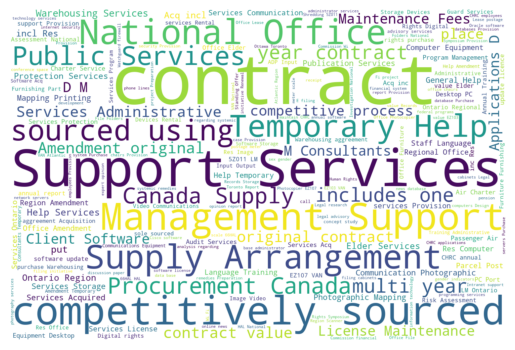

In [37]:
from wordcloud import WordCloud

# Generación de nube de palabras para comentarios en inglés
text = ' '.join(df['comments_en'].dropna())
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import pandas as pd

# Inspección inicial de la columna 'year'
print("Inspección inicial de la columna 'year_peticiones':")
print(df['year_x'].head(20))  # Muestra las primeras 20 filas de la columna 'year'
print("Inspección inicial de la columna 'year_contratos':")
print(df['year_y'].head(20))  # Muestra las primeras 20 filas de la columna 'year'

# Revisar valores únicos para identificar posibles problemas
print("\nValores únicos en 'year_peticiones':", df['year_x'].unique())
print("\nValores únicos en 'year_contratos':", df['year_y'].unique())

# Paso 1: Limpiar espacios y convertir a tipo string para análisis
df['year_x'] = df['year_x'].astype(str).str.strip()
df['year_y'] = df['year_y'].astype(str).str.strip()

# Paso 2: Extraer sólo los números, ignorando caracteres inusuales
df['year_x'] = df['year_x'].str.extract('(\d{4})')  # Extrae años de 4 dígitos
df['year_x'] = pd.to_numeric(df['year_x'], errors='coerce')  # Convierte a numérico, convierte errores a NaN

df['year_y'] = df['year_y'].str.extract('(\d{4})')  # Extrae años de 4 dígitos
df['year_y'] = pd.to_numeric(df['year_y'], errors='coerce')  # Convierte a numérico, convierte errores a NaN

# Mostrar valores únicos después de limpieza
print("\nValores únicos en 'year_peticiones' después de la limpieza:", df['year_x'].unique())
print("\nValores únicos en 'year_contratos' después de la limpieza:", df['year_y'].unique())

# Verificar si hay valores nulos después de la limpieza y conversión
print("\nCantidad de valores nulos en 'year_peticiones' después de la limpieza:", df['year_x'].isnull().sum())
print("\nCantidad de valores nulos en 'year_contratos' después de la limpieza:", df['year_y'].isnull().sum())

# Filtrar los datos para mantener sólo años válidos (2000 a 2024)
df = df.dropna(subset=['year_x'])  # Remover filas con valores nulos en 'year'
df = df[(df['year_x'] >= 2000) & (df['year_x'] <= 2024)]  # Filtrar para años válidos

df = df.dropna(subset=['year_y'])  # Remover filas con valores nulos en 'year'
df = df[(df['year_y'] >= 2000) & (df['year_y'] <= 2024)]  # Filtrar para años válidos

# Verificar si se han filtrado correctamente los datos
if df.empty:
    print("No se encontraron contratos con valores en el rango esperado. Verifica los datos originales o ajusta el rango de fechas.")
else:
    # Mostrar el top de contratos más valiosos para validación
    top_contracts = df.nlargest(100, 'contract_value')
    print("Top 100 Contratos con Mayor Valor:")
    print(top_contracts[['owner_org', 'vendor_name', 'contract_value', 'year_y', 'month_y']])


Inspección inicial de la columna 'year_peticiones':
0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
15    2020
16    2020
17    2020
18    2020
19    2020
Name: year_x, dtype: int64
Inspección inicial de la columna 'year_contratos':
0     2016
1     2013
2     2016
3     2016
4     2016
5     2016
6     2016
7     2016
8     2016
9     2016
10    2016
11    2016
12    2016
13    2016
14    2016
15    2015
16    2016
17    2016
18    2016
19    2016
Name: year_y, dtype: int64

Valores únicos en 'year_peticiones': [2020 2021 2022 2023 2024]

Valores únicos en 'year_contratos': [2016 2013 2015 2019 2017 2018 2008 2014]

Valores únicos en 'year_peticiones' después de la limpieza: [2020 2021 2022 2023 2024]

Valores únicos en 'year_contratos' después de la limpieza: [2016 2013 2015 2019 2017 2018 2008 2014]

Cantidad de valores nulos en 'year_peticiones' después de la limpiez

Temporal Distribution of Contracts and Requests
Objective: Visualize how contracts and requests have evolved over time, which can reveal trends or peaks of interest.

In [43]:
import pandas as pd

# Convertir 'year' a enteros para eliminar decimales
df['year_x'] = df['year_x'].astype(int)  # Esto corrige los valores de año para ser enteros.
df['year_y'] = df['year_y'].astype(int)  # Esto corrige los valores de año para ser enteros.

In [47]:
import plotly.express as px

# Asegúrate de contar la cantidad de registros por año
df_annual = df.groupby('year_x').size().reset_index(name='count')

# Crear el gráfico de líneas
fig = px.line(
    df_annual, 
    x='year_x', 
    y='count', 
    title='Distribución Temporal de Solicitudes', 
    labels={'year': 'Año', 'count': 'Cantidad'},
    markers=True  # Añade marcadores para cada punto
)

# Mostrar el gráfico
fig.show()


In [46]:
import plotly.express as px

# Asegúrate de contar la cantidad de registros por año
df_annual = df.groupby('year_y').size().reset_index(name='count')

# Crear el gráfico de líneas
fig = px.line(
    df_annual, 
    x='year_y', 
    y='count', 
    title='Distribución Temporal de Contratos', 
    labels={'year': 'Año', 'count': 'Cantidad'},
    markers=True  # Añade marcadores para cada punto
)

# Mostrar el gráfico
fig.show()

Trend Analysis in the Chart:

Decline in 2021: There is a significant decrease in the number of contracts and requests between 2020 and 2021. This may indicate a reduction in contracting activity or in the number of information access requests during that period. This trend could be related to external events such as the COVID-19 pandemic, which may have impacted government operations and contract execution.

Stability between 2021 and 2022: After the sharp initial decline, the number of contracts and requests remains relatively stable during 2021 and 2022. This suggests that, despite the initial drop, contracting activity stabilized, though at lower levels than in 2020.

Slight Increase in 2023: There is a small increase in 2023, which may indicate a partial recovery in contracting activity or an increase in access requests. This could reflect a gradual post-pandemic reactivation or changes in transparency policies.

New Decline in 2024: Finally, the chart shows another decrease in 2024. This may indicate factors such as budget adjustments, changes in contracting policies, or a reduction in demand for information access requests.

Investigate Causes of the Decline in 2021

To investigate the drop between 2020 and 2021, we can take the following steps:

Filter Specific Data for 2020 and 2021: Analyze specific contracts and requests from these years. Identify if there are any changes in contracting policies or in the request procedures.

In [55]:
df_2018 = df[df['year_y'] == 2018]
df_2019 = df[df['year_y'] == 2019]

# Comparar número de contratos y solicitudes
print("Contratos 2018:", df_2018.shape[0])
print("Contratos 2019:", df_2019.shape[0])


Contratos 2018: 1582
Contratos 2019: 85


In [56]:
df_2020 = df[df['year_x'] == 2020]
df_2021 = df[df['year_x'] == 2021]

# Comparar número de contratos y solicitudes
print("Solicitudes 2020:", df_2020.shape[0])
print("Solicitudes 2021:", df_2021.shape[0])

Solicitudes 2020: 1511
Solicitudes 2021: 670


Analysis of Policy or Budget Changes:

Check the data for changes in contract values, types of contracts, or any notes on budget restrictions or shifts in government policies.

In [57]:
# Analizar comentarios o notas en los contratos de 2021
cambios_politicos = df_2021[['comments_en', 'additional_comments_en']].dropna()
print(cambios_politicos.head(30))


                                            comments_en  \
1327                                Protection Services   
1328                 Rental of Motor and Other Vehicles   
1329  Communication, Photographic, Mapping, Printing...   
1330                      Passenger Air Charter Service   
1331                      Passenger Air Charter Service   
1332     Administrative and Management Support Services   
1333     Administrative and Management Support Services   
1334  Temporary Help Services Acquired For General Help   
1335  Acq (incl Res) Office Furniture/ Furnishing & ...   
1336                      Passenger Air Charter Service   
1337                                Protection Services   
1338                                Protection Services   
1339                                Protection Services   
1340                                     Guard Services   
1341      ADP Input-Output and Storage Devices - Rental   
1342       License/Maintenance Fees for Client Software 

Decline in 2021:

Observation: There was a significant decrease in the number of contracts and information access requests between 2020 and 2021.
Potential Causes: This could be related to the pandemic, where budget restrictions or changes in government policies may have reduced contracting activity and requests.
Detailed Analysis: Comments from 2021 indicate that many contracts were amended with specific values only for the first quarter, which may reflect an adjusted response to economic uncertainty or changing conditions.

Contracts with year == 2021: It appears that there are contracts listed under the year 2021, but not all of them have a contract_period_start in 2021. This could indicate contracts signed before 2021 that were still active during that year.

Regarding the Missing contract_period_start in 2021

Pandemic Context: It is reasonable to assume that many new projects were delayed or halted due to economic uncertainty and global restrictions. It may be useful to examine if there are any comments or amendments that support this idea.

----------------------------------------------------------------------------------------------------------

Analysis of Active Employment Contracts and Visualization

To explore the activity of employment contracts and how they vary across the analyzed years, a bubble chart may be suitable to display the number of active contracts, with the bubble size representing the number of contracts.

Step-by-Step for Active Contracts Analysis

Step 1: Count Active Contracts by Year

In [65]:
# Asegurarse de que 'contract_period_start' esté en formato datetime
df['contract_period_start'] = pd.to_datetime(df['contract_period_start'], errors='coerce')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], errors='coerce')

# Contar contratos activos por año
años_interes = [2016,2013,2015,2019,2017,2018,2008,2014]
contratos_activos = []

for año in años_interes:
    # Filtrar contratos activos en el año correspondiente
    contratos_año = df[
        (df['contract_period_start'].dt.year <= año) &
        (df['delivery_date'].dt.year >= año)
    ]
    contratos_activos.append({
        'year_y': año,
        'active_contracts': len(contratos_año)
    })

df_contratos_activos = pd.DataFrame(contratos_activos)

print("Contratos activos por año:")
print(df_contratos_activos)

Contratos activos por año:
   year_y  active_contracts
0    2016              1649
1    2013                19
2    2015              1209
3    2019              1377
4    2017               798
5    2018              1983
6    2008                11
7    2014                72


Step 2: Bubble Chart with Plotly

To visualize active contracts over time and allow for interactive comparison:

In [66]:
import plotly.express as px

# Crear el gráfico de burbujas
fig = px.scatter(
    df_contratos_activos, 
    x='year_y', 
    y='active_contracts', 
    size='active_contracts', 
    hover_name='year_y', 
    title='Contratos Laborales Activos por Año',
    labels={'active_contracts': 'Contratos Activos', 'year_y': 'Año'},
    size_max=60  # Tamaño máximo de las burbujas
)

fig.show()

In [68]:
import pandas as pd

# Contar contratos activos por organización
contratos_por_org = df.groupby('owner_org_title_x').size().reset_index(name='count')

# Ordenar el conteo de forma descendente para ver las organizaciones con más contratos primero
contratos_por_org = contratos_por_org.sort_values(by='count', ascending=False)

# Imprimir el conteo de contratos por organización
print("Conteo de Contratos Activos por Organización:")
for index, row in contratos_por_org.iterrows():
    print(f"Organization: {row['owner_org_title_x']} - Contratos Activos: {row['count']}")

Conteo de Contratos Activos por Organización:
Organization: Military Grievances External Review Committee | Comité externe d’examen des griefs militaires - Contratos Activos: 1128
Organization: Crown-Indigenous Relations and Northern Affairs Canada | Relations Couronne-Autochtones et Affaires du Nord Canada - Contratos Activos: 946
Organization: National Film Board | Office national du film - Contratos Activos: 513
Organization: Canadian Human Rights Commission | Commission canadienne des droits de la personne - Contratos Activos: 360
Organization: Parole Board of Canada | Commission des libérations conditionnelles du Canada - Contratos Activos: 330
Organization: Elections Canada | Élections Canada - Contratos Activos: 212
Organization: Natural Sciences and Engineering Research Council of Canada | Conseil de recherches en sciences naturelles et en génie du Canada - Contratos Activos: 99
Organization: Public Service Commission of Canada | Commission de la fonction publique du Canada - C

In [74]:
import plotly.express as px

# Contar contratos activos por organización responsable
contratos_por_org = df.groupby('owner_org_title_x').size().reset_index(name='count')

# Crear el gráfico de burbujas para organizaciones
fig_org = px.scatter(
    contratos_por_org,
    x='owner_org_title_x',
    y='count',
    size='count',
    color='owner_org_title_x',  # Asignar un color diferente a cada grupo
    hover_name='owner_org_title_x',
    title='Contratos Activos por Organización',
    labels={'count': 'Contratos Activos', 'owner_org_title_x': 'Organización'},
    size_max=60
)

# Ajustar diseño para ocultar etiquetas en el eje X
fig_org.update_layout(
    xaxis=dict(showticklabels=False),  # Ocultar etiquetas del eje X
    showlegend=False  # Ocultar la leyenda para mantener el gráfico limpio
)

# Mostrar el gráfico
fig_org.show()

In [69]:
# Contar contratos activos por descripción en inglés
contratos_por_desc = df.groupby('description_en').size().reset_index(name='count')

# Crear el gráfico de burbujas para descripciones
fig_desc = px.scatter(
    contratos_por_desc,
    x='description_en',
    y='count',
    size='count',
    color='description_en',  # Asignar un color diferente a cada grupo
    hover_name='description_en',
    title='Contratos Activos por Descripción',
    labels={'count': 'Contratos Activos', 'description_en': 'Descripción'},
    size_max=60
)

fig_desc.update_layout(
    xaxis=dict(showticklabels=False),  # Ajustar la rotación de etiquetas si son muchas
    showlegend=False  # Ocultar leyenda si hay muchas categorías
)

fig_desc.show()

In [70]:
# Contar contratos activos por descripción
contratos_por_descripcion = df.groupby('description_en').size().reset_index(name='count')

# Ordenar el conteo de forma descendente para ver las descripciones más comunes primero
contratos_por_descripcion = contratos_por_descripcion.sort_values(by='count', ascending=False)

# Imprimir el conteo de contratos por descripción
print("Conteo de Contratos Activos por Descripción:")
for index, row in contratos_por_descripcion.iterrows():
    print(f"Descripción: {row['description_en']} - Contratos Activos: {row['count']}")

Conteo de Contratos Activos por Descripción:
Descripción: Audio-visual services - Contratos Activos: 432
Descripción:  LICENSE/MAITNENANCE OF COMPUTER SOFTWARE- DISTRIBUTED COMPUTING ENVIRONMENT - Contratos Activos: 235
Descripción: Management consulting - Contratos Activos: 198
Descripción: Temporary Help - Contratos Activos: 99
Descripción:  OTHER BUSINESS SERVICES - Contratos Activos: 94
Descripción:  COMPUTER EQUIPMENT RELATED TO PRODUCTION AND OPERATIONS (P&O) ENVIRONMENT —ALL SERVERS, STORAGE, PRINTERS ETC (Includes all related parts and peripherals)  - Contratos Activos: 94
Descripción:  PROTECTION SERVICES - Contratos Activos: 94
Descripción: COMPUTER EQUIPMENT RELATED TO DISTRIBUTED COMPUTING ENVIRONMENT (DCE)—DESKTOP/PERSONAL/PROTABLE (Includes all related parts and peripherals)  - Contratos Activos: 94
Descripción:  LANGUAGE TRAINING  - Contratos Activos: 94
Descripción: Information technology and telecommunications consultants - Contratos Activos: 90
Descripción: Business s

In [72]:
df_2019 = df[df['year_y'] == 2019]

# Analizar valores de contratos y tipos de contratos
print(df_2019['contract_value'].describe())
print(df_2019.shape[0])

count        85.000000
mean      81984.449294
std      102232.769283
min       10080.000000
25%       10080.000000
50%       43803.000000
75%      207486.810000
max      290024.170000
Name: contract_value, dtype: float64
85


In [73]:
# Analizar por categoría de contrato
#categorias_2023 = df_2023.groupby('commodity_type').size().reset_index(name='count')
categorias_2019 = df_2019.groupby('comments_en').size().reset_index(name='count')
print(categorias_2019.sort_values('count', ascending=False).head(50))

                                         comments_en  count
2  This contract was competitively sourced. This ...     22
1                             Sole-Sourced  Contract     11
3  This contract was sole sourced and issued by S...      2
0                                           Printing      1


What does it mean if there are contracts with year == 2021 but without contract_period_start in 2021?

This indicates that these contracts were initiated in previous years but remained active in 2021. This is common for multi-year contracts that span several years and whose execution does not necessarily start or end in the same year.

Why does Q1 refer to the first quarter?

In common financial reporting and contract terminology, Q1 refers to "Quarter 1," which is the first quarter of the year (January, February, and March).


-----------------------------------------------------------------------------------------------------------------------

Gráfico de Burbujas para owner_org_title_x
Este gráfico mostrará la cantidad de contratos activos por organización responsable (owner_org_title_x) y los representará con burbujas de diferentes tamaños y colores.

Active Contracts by Organization:

Predominant Organizations: We see that organizations such as the "Military Grievances External Review Committee" and "Crown-Indigenous Relations and Northern Affairs Canada" have the highest number of active contracts, with 1,128 and 946 contracts, respectively.
Diversity of Contracts: The list shows a variety of organizations involved, reflecting a wide range of activities and areas of focus in government contracts.
Contracts Related to Science and Technology: Organizations like the "Canadian Space Agency" and the "Natural Sciences and Engineering Research Council of Canada" have active contracts, indicating an investment in science and technology.
Observations on Contract Size: The variation in the size of active contracts (indicated by the size of the bubbles) reflects the magnitude of investment across different areas.

Active Contracts by Description:

Audio-Visual and Software Services: The most common descriptions include audio-visual services, software licenses, and IT consulting. This suggests a high demand for technology and communication services within the government.
Focus on Consulting and Professional Services: Many descriptions are related to management consulting, temporary help services, and other professional services, highlighting the government's reliance on external experts for various functions.
Contracts for Protection and Maintenance Services: There is a high frequency of contracts for protection and software maintenance services, likely related to the ongoing need for security and technological updates.
Diversity in Contract Types: The list reflects a wide variety of services and products, indicating the breadth and complexity of the government’s operational needs.

--------------------------------------------------------------------------------------

Analysis and Relationship between Organizations and Contract Descriptions

Investment in Technology and Digital Services During the Pandemic:

Pandemic Impact: The COVID-19 pandemic accelerated digital transformation across many organizations, including those with non-technical missions, such as military organizations. This transformation likely led to increased contracting for technology, software, and audiovisual services to support remote operations, communication, and project management in a remote work environment.

Audiovisual Contracts: The predominance of audiovisual and technology-related descriptions suggests that many organizations, regardless of their primary mission, invested in these areas to ensure operational continuity, such as creating digital content, providing online training, and facilitating virtual communication.

Outsourcing of External Services:

Outsourcing and Consulting: The high volume of contracts for technology and audiovisual services suggests a strategy of outsourcing to acquire skills that are not available internally within government organizations. This allows for a rapid response to new demands without the need for immediate internal restructuring.

Operational Flexibility: Organizations like the "Military Grievances External Review Committee" may have prioritized operational flexibility by contracting technology services to support their activities during the pandemic, even if these services are not directly related to their original mission.

Disconnect between Organizational Purpose and Types of Contracts:

Contracting Independent of Core Mission: Observing that a military organization has a large number of active contracts with a predominant focus on audiovisual services suggests that contracting may be driven more by urgent operational needs (such as technology and communication) than by the organization’s core mission (military or defense).

Capacity Expansion: This trend may indicate an effort by organizations to expand their capabilities in critical areas for business continuity, beyond their usual operations.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Ongoing Monitoring of 2024

Monthly Trend Analysis: Break down the 2024 data by month to identify if there are specific months with pronounced declines.

In [75]:
df_2024 = df[df['year_x'] == 2024]

# Análisis por mes
mensual_2024 = df_2024.groupby('month_x').size().reset_index(name='count')
fig = px.line(mensual_2024, x='month_x', y='count', title='Tendencia Mensual en 2024')
fig.show()


Trend in 2024:

Observation: The monthly trend chart for 2024 shows fluctuations with peaks and troughs.
Potential Causes: This could be related to the scheduling and planning of contracts or specific events in certain months.
Detailed Analysis: Without additional data, it is difficult to pinpoint the exact reason, but these fluctuations indicate instability in the contracting processes that should be monitored.

--------------------------------------------------------------------------------------------

We will now begin the analysis using the dataframe that contains all records, including those that matched in the merge, as well as those originating from each dataset individually.

In [93]:
df_all = pd.read_csv('C:/Users/natal/OneDrive/Escritorio/Canadian Pr/datasets/combined_data_all_corrected.csv', 
                 dtype={'year_x': 'Int64', 'month_x': 'Int64','year_y': 'Int64', 'month_y': 'Int64'})
pd.set_option('display.max_columns', None)
display(df_all)

,year_x,month_x,owner_org,owner_org_title_x,reference_number,procurement_id,vendor_name,vendor_postal_code,buyer_name,contract_date,economic_object_code,description_en,description_fr,contract_period_start,delivery_date,contract_value,original_value,amendment_value,comments_en,comments_fr,additional_comments_en,additional_comments_fr,agreement_type_code,trade_agreement,land_claims,commodity_type,commodity_code,country_of_vendor,solicitation_procedure,limited_tendering_reason,trade_agreement_exceptions,aboriginal_business,aboriginal_business_incidental,intellectual_property,potential_commercial_exploitation,former_public_servant,contracting_entity,standing_offer_number,instrument_type,ministers_office,number_of_bids,article_6_exceptions,award_criteria,socioeconomic_indicator,reporting_period,record_created,record_modified,user_modified,owner_org_title_y,year_y,month_y,_merge
0,2020,4,casdo-ocena,Accessibility Standards Canada | Normes d’acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,left_only
1,2020,5,casdo-ocena,Accessibility Standards Canada | Normes d’acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,left_only
2,2022,10,casdo-ocena,Accessibility Standards Canada | Normes d’acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,left_only
3,2022,1,casdo-ocena,Accessibility Standards Canada | Normes d’acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,left_only
4,2022,2,casdo-ocena,Accessibility Standards Canada | Normes d’acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,<NA>,<NA>,tbs-sct,NaN,C-2017-2018-Q3-00007,2406218540,Avenai Inc.,NaN,NaN,2017-10-17,499,Other professional services not elsewhere spec...,Autres services professionnels non précisés ai...,2017-10-17,2018-01-31,25000.00,25000.00,0.0,NaN,NaN,Project Executive to support the modernization...,Responsable de projet qui appuiera le cadre de...,Y,NaN,NaN,S,R199,CA,TN,85,0,NaN,N,A65,N,N,PWSOSA,E60ZT-152199/126/ZT,C,NaN,NaN,NaN,NaN,NaN,2017-2018-Q3,NaN,NaN,*,NaN,2017,10,right_only
9916,<NA>,<NA>,tbs-sct,NaN,C-2017-2018-Q3-00019,2406218188,Excel Human Resources Inc.,NaN,NaN,2017-11-24,499,Other professional services not elsewhere spec...,Autres services professionnels non précisés ai...,2017-11-24,2018-03-31,24940.49,24940.49,0.0,NaN,NaN,Privacy Impact Assessment (PIA) Specialist to ...,Spécialiste de l’évaluation des facteurs relat...,Y,NaN,NaN,S,R019,CA,TN,85,0,NaN,N,A65,N,N,PWSOSA,NaN,C,NaN,NaN,NaN,NaN,NaN,2017-2018-Q3,NaN,NaN,*,NaN,2017,11,right_only
9917,<NA>,<NA>,tbs-sct,NaN,C-2018-2019-Q2-00026,2406219160,Ernst & Young LLP,NaN,NaN,2018-08-27,491,Management consulting,Services de conseillers en gestion,2018-08-27,2018-12-31,300000.00,300000.00,0.0,NaN,NaN,Senior Consultants and Subject Matter Experts ...,Experts-conseils principaux et experts en la m...,NaN,NaN,NaN,S,R019,CA,AC,71,0,NaN,N,A65,N,N,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,2018-2019-Q2,NaN,NaN,*,NaN,2018,8,right_only
9918,<NA>,<NA>,tbs-sct,NaN,C-2017-2018-Q3-00049,2406218134,The Corporate Executive,NaN,NaN,2017-09-28,1143,"Printed matter, including books, newspapers

In [83]:
# Asegúrate de que 'year' es numérico
df_all['year_x'] = pd.to_numeric(df_all['year_x'], errors='coerce')
print(df_all['year_x'])
# Asegúrate de que 'year' es numérico
df_all['year_y'] = pd.to_numeric(df_all['year_y'], errors='coerce')
print(df_all['year_y'])

0       2020
1       2020
2       2022
3       2022
4       2022
        ... 
9915    <NA>
9916    <NA>
9917    <NA>
9918    <NA>
9919    <NA>
Name: year_x, Length: 9920, dtype: Int64
0       2020
1       2020
2       2022
3       2022
4       2022
        ... 
9915    <NA>
9916    <NA>
9917    <NA>
9918    <NA>
9919    <NA>
Name: year_y, Length: 9920, dtype: Int64


Separate Records by Merge Category

We divide the dataset into three groups: left_only, right_only, and both to analyze differences and similarities.

In [86]:
# Filtrar los registros según la columna '_merge'
df_left_only = df_all[df_all['_merge'] == 'left_only']
df_right_only = df_all[df_all['_merge'] == 'right_only']
df_both = df_all[df_all['_merge'] == 'both']

# Verificar la cantidad de registros en cada categoría
print("Registros 'left_only':", df_left_only.shape[0])
print("Registros 'right_only':", df_right_only.shape[0])
print("Registros 'both':", df_both.shape[0])

Registros 'left_only': 3799
Registros 'right_only': 2187
Registros 'both': 3934


Identify Peaks by Year in Contracts and Access Requests

First, we separate the records by year to identify peaks.

In [84]:
# Separar los registros por tipo de merge
df_completed_requests_only = df_all[df_all['_merge'] == 'left_only']
df_contracts_only = df_all[df_all['_merge'] == 'right_only']

# Contar registros por año en ambos datasets
requests_by_year = df_completed_requests_only['year_x'].value_counts().sort_index()
contracts_by_year = df_contracts_only['year_y'].value_counts().sort_index()

# Mostrar la distribución anual
print("Solicitudes de acceso completadas por año:")
print(requests_by_year)

print("\nContratos por año:")
print(contracts_by_year)

Solicitudes de acceso completadas por año:
2020     611
2021     688
2022     821
2023    1102
2024     577
Name: year_x, dtype: Int64

Contratos por año:
Series([], Name: year_y, dtype: Int64)


Visualization of Peaks by Year

We will use line charts to show trends over the years.

Line Chart for Completed Access Requests and Contracts

In [13]:
import plotly.express as px

# Gráfico para solicitudes de acceso completadas
fig_requests = px.line(
    requests_by_year.reset_index(), 
    x='index', 
    y='year', 
    title='Tendencia de Solicitudes de Acceso Completadas por Año',
    labels={'index': 'Año', 'year': 'Cantidad de Solicitudes'}
)
fig_requests.show()

Select the Appropriate Dataset for Lag Analysis
Since we want to evaluate lagged impacts, we will use the all_dates dataset, which contains records from left_only, right_only, and both. This will allow us to analyze both contracts (including those from previous years) and information access requests, and observe potential correlations with a time lag.

Explore Postal Code Availability
We will check for the presence of postal codes in the contract data to assess if we can create geographic visualizations. Typically, postal codes are found in fields related to the vendor's location (vendor_postal_code), but we will verify if they are present and complete.

Code for Analysis:

A. Lag Analysis
We will evaluate the lag between contracts and information access requests.

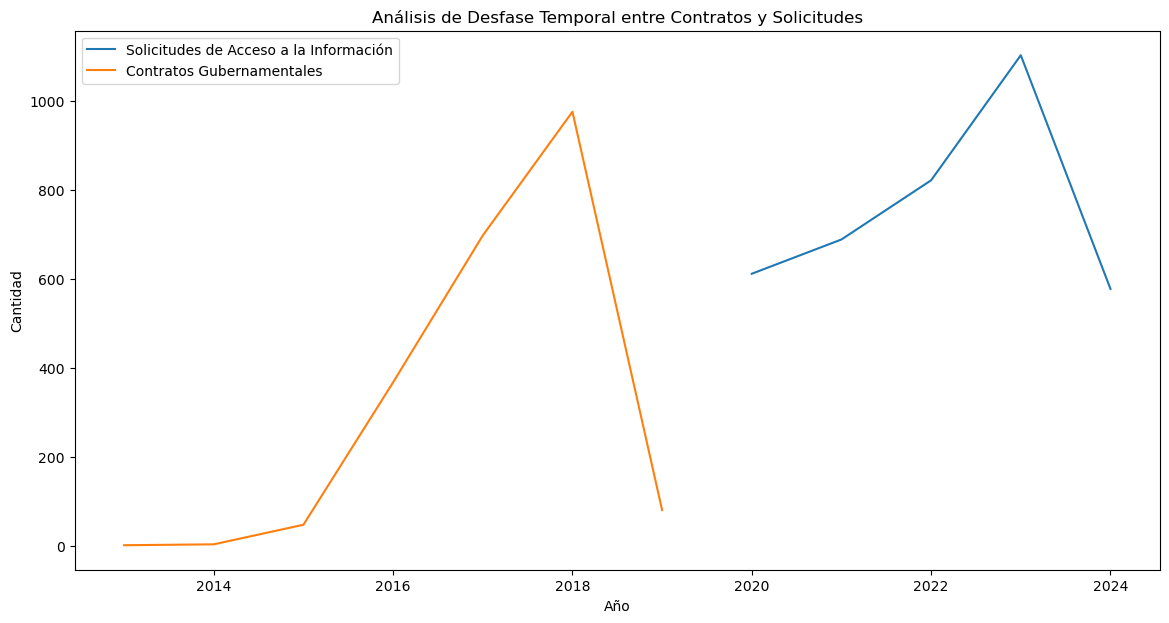

In [98]:
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el dataset all_dates
df_all_dates = pd.read_csv("C:/Users/natal/OneDrive/Escritorio/Canadian Pr/datasets/combined_data_all_corrected.csv")

# Convertir las fechas de 'contract_date' y extraer el año y mes
df_all_dates ['contract_date'] = pd.to_datetime(df_all_dates ['contract_date'], errors='coerce')
df_all_dates ['contract_year'] = df_all_dates ['contract_date'].dt.year

# Filtrar sólo los registros 'left_only' y 'right_only' para analizar desfase
df_left_only = df_all_dates [df_all_dates ['_merge'] == 'left_only']
df_right_only = df_all_dates [df_all_dates ['_merge'] == 'right_only']

# Contar solicitudes por año
solicitudes_por_año = df_left_only.groupby('year_x').size().reset_index(name='solicitudes')

# Contar contratos por año
contratos_por_año = df_right_only.groupby('contract_year').size().reset_index(name='contratos')

# Combinar ambos conteos por año para observar desfases
df_merged = pd.merge(solicitudes_por_año, contratos_por_año, left_on='year_x', right_on='contract_year', how='outer')

# Plot para visualizar los impactos retardados
plt.figure(figsize=(14, 7))
plt.plot(df_merged['year_x'], df_merged['solicitudes'], label='Solicitudes de Acceso a la Información')
plt.plot(df_merged['contract_year'], df_merged['contratos'], label='Contratos Gubernamentales')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Análisis de Desfase Temporal entre Contratos y Solicitudes')
plt.legend()
plt.show()


Chart Analysis:

Government Contracts (2013-2018):
There is a significant increase in the number of contracts between 2014 and 2018, reaching a peak around 2018, followed by an abrupt decline.
This pattern could suggest a rise in contracting activity during these years, possibly related to specific events or policies in those years.

Information Access Requests (2020-2024):
Requests begin to increase significantly starting in 2020, reaching their peak in 2023, which appears to align with heightened public interest in government transparency and access to information.
The trend in requests suggests a lagged impact from previous contracts, where contracts issued in prior years may have led to an increase in information access requests in subsequent years.

In [97]:
# Verificar si existen datos de códigos postales en los contratos
if 'vendor_postal_code' in df_all_dates.columns:
    postal_codes = df_all_dates['vendor_postal_code'].dropna().unique()
    print(f"Total códigos postales únicos: {len(postal_codes)}")
    print(postal_codes[:10])  # Mostrar los primeros 10 códigos postales
else:
    print("No se encontraron códigos postales en el dataset.")

Total códigos postales únicos: 0
[]


Implications:

Lagged Impact: The chart suggests that government contracts in previous years (2014-2018) may be related to the increase in information access requests starting in 2020. This lag could be associated with the availability of public information, controversial events, or the implementation of policies whose effects became visible to the public later on.

Monitoring Strategies:
It would be valuable to conduct a more detailed analysis, possibly at the level of contract categories or types of information requested, to more accurately assess this correlation.
Additionally, we can investigate changes in legislation or proactive disclosure policies that coincide with the observed peaks.